# **Reviewing Manhattan's Urban Treescape**
## **Competition - City Tree Species**

Last updated: 26 December 2022

![cover image](data/Image.jpg)

## Introduction / Background

Trees in urban settings have numerous economic and health benefits, including providing cooling and mitigating 'heat islands' caused by hard surfaces, removing pollutants from the air, reducing energy use (for example air-conditioning in summer), as well as reducing the number of reported cardiovascular health ailments, reduced depression and increased life satisfaction. In fact, is is estimated that the economic benefit to the US from its street trees is around $18 million per year. And the importance of street trees in urban landscapes is likely to only increase as global temperatures increase and populations become increasingly urbanised.

As a result, it is critical that the city of New York identify the best tree species to plant on their streets in order to maintain or where possible, to increase the tree coverage and to replace trees that are either dead, damaged or in otherwise poor health.

This report focused on the borough of Manhattan, which is one of five boroughs making up New York City (the others being The Bronx, Brooklyn, Queens, and Staten Island). It found that:
- the most popular species was the Honeylocust, making up 20.5% of all trees in the 2015 Census data, with the Callery Pear and Ginkgo sitting in second (11.4%) and third place (9.1%)
- the Golden Raintree, Sawtooth Oak and Kentucky Coffeetree had the highest proportions of trees in good health (88.6%, 85.3% and 85.1% respectively)
- whilst no species had a significant proportion of trees in poor health (the highest was 16.9%), the Silver Maple, Dawn Redwood, Bald Cypress and Littleleaf Linden had the largest proportions of trees in this category
- the species with the largest trees, on average, were the American Elm (13.9 inches), Weeping Willow (13.5 inches), London Planetree (13.2 inches) and White Pine (13.0 inches)
- linear correlation analysis indicated a slight positive relationship between tree diameter and tree health, and a slight negative relationship between tree health and whether there was a not-otherwise-specified problem with a branch of the tree. The strength of all other relationships between tree health and available tree attributes were negligible. Mutual information analysis indicates that the attributes most important to tree health were geographic location, tree species and tree size (in that order)
- The neighbourhoods with the largest amount of trees are Upper West Side, Upper East Side-Carnegie Hill and West Village, but the neighbourhoods with the largest amount of trees in good health are Stuyvesant Town-Cooper Village, Hudson Yards-Chelsea-Flatiron-Union Square, and Upper West Side

Based on the above information, and the preference of the urban design team for larger tree species, the report recommends that the following tree species be planted on the streets of Manhattan in the future:
1. American Elm
2. Siberian Elm
3. Willow Oak
4. Pin Oak
5. White Ash
6. Honeylocust
7. Schumard's Oak
8. Sawtooth Oak
9. Magnolia
10. Shingle Oak

## Data

The data used for this analysis consisted of two different datasets provided by the organisation's city design team and sourced from the City of New York's open data website [NYC Open Data](https://opendata.cityofnewyork.us/data/). The first was from a tree census conducted in 2015 on New York City (NYC) neighbourhoods. It contained information on 64,229 trees across 20 different attributes, including the geographical coordinates of each tree's location, its species, diameter, location relative to the curb, health, and a range of problems with the tree.

The second was geographical information about the neighbourhoods in Manhattan.

## Methodology / Approach

The report used a combination of geospatial visualisation and exploratory analysis to visualise tree locations in Manhattan, extract insights about the tree species planted in Manhattan (most common species planted, proportions in good, fair and bad health etc) as well as explore whether or not there was any correlation between a tree's health / status and the available attributes.

## Findings

In [35]:
import contextily as cx
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OrdinalEncoder

In [36]:
trees = pd.read_csv('data/trees.csv')
neighbourhoods = gpd.read_file('data/nta.shp')

# # check the dimensions of the first dataframe
# print(trees.shape)

# # double-check for missing values
# print(trees.isna().sum())
# print("-----")
# print(neighbourhoods.isna().sum())

# rather than dropping these values, replace with "unknown"/"N/A"
trees.fillna(value = {"spc_common":"unknown", "health":"_N/A"}, inplace = True)

In [37]:
# # observe that dead trees do not have a health status
# print(pd.crosstab(trees.status, trees.health))
# print("-----")

# # check if the dead trees are all of an unknown species... yes with one exception
# dead_trees = trees.loc[trees.status == "Dead"]
# print(dead_trees.spc_common.value_counts())

Figure 1.1 below clearly indicates that the most popular overall tree species planted in Manhattan in 2015 was the Honeylocust (20.5% of all trees), with the Callery Pear, Ginkgo, Pin Oak, Sophora, London Planetree, Japanese Zelkova and Littleleaf Linden (in that order) also being popular trees. All remaining 121 species individually made up less than 3% of all trees currently planted.

In [38]:
# What are the most common tree species in Manhattan?
counts = trees.groupby('spc_common', as_index=False).size()
counts['prop'] = counts['size'] / trees.shape[0] * 100
counts.sort_values(by='size', inplace=True, ascending=False)
counts['rank'] = counts.prop.rank(method='min', ascending=False)

# create a single root node
counts['all'] = "All Trees"

fig = go.Figure()
fig.add_trace(
    go.Treemap(
        labels = counts.spc_common,
        parents = counts['all'],
        values = counts.prop,
        customdata = counts[['size','rank']],
        root_color = 'lightgrey',
        marker_colorscale = 'Greens',
        hovertemplate = 'Species: %{label}'+'<br>Percentage: %{value:.2f}'+'<br>Count: %{customdata[0]:,}'+'<br>Rank: %{customdata[1]:.0f}</br>'+'<extra></extra>')
)

fig.update_layout(width = 600, height = 800,
                  uniformtext=dict(minsize=10, mode='hide'),
                  margin = dict(t=50, l=5, r=5, b=5),
                  title_text='Figure 1: Tree species by total proportion currently planted')

Figures 2.1 and 2.2 looked at the question in a slightly different way by examining the species in terms of the proportions in the good and poor health status categories. Species that had been planted less than 30 times were dropped from the dataset to minimise results being skewed by tree species that had only been planted a handful of times (note that this threshold was semi-arbitrary and can easily be adjusted). As a result, about 40% of the total number of unique species remained. Figure 2.1 indicated that whilst tree species commonly planted do reasonably well as street trees in Manhattan, (namely the Honeylocust, Sophora, Pin Oak and Japanese Zelkova), some other species planted not nearly as often did even better. For example, the Golden Raintree, Sawtooth Oak and Kentucky Coffeetree were all listed in good health over 85% of the time compared to a percentage of 83.2% for Manhattan's most commonly planted tree - the Honeylocust.

Figure 2.2 shows the top 30 tree species by proportion of trees listed in poor health. Whilst it is pleasing to see that no species was particularly unsuited to Manhattan's urban environment (the top-ranked species had only 16.9% of trees listed in poor health), it indicated that some species commonly planted should perhaps be re-considered. Notable amongst this list is the Littleleaf Linden, American Linden, London Planetree, Gingko, Callery Pear and Green Ash.

In [39]:
# What are the healthiest species?
def select_species_threshold(df, desired_num):
    tree_species = df.groupby(['spc_common'], as_index=False).size()
    tree_species.sort_values(by='size', inplace=True, ascending=False)
    tree_species = tree_species.loc[tree_species['size'] >= desired_num, ]
    species_list = tree_species.spc_common.to_list()
    return species_list

species_list = select_species_threshold(trees, 30)
trees_sub = trees.loc[trees.spc_common.isin(species_list), ]
counts = trees_sub.groupby(['spc_common', 'health'], as_index=False).size()
species_counts = trees_sub.groupby('spc_common', as_index=False).size()
counts = pd.merge(counts, species_counts, how = 'left', on = 'spc_common')
counts['prop'] = counts.size_x / counts.size_y * 100
counts_wide = pd.pivot(counts, index = 'spc_common', columns = 'health', values = 'prop')
counts_wide.drop('_N/A', axis=1, inplace=True)
counts_wide.sort_values(by='Good', inplace=True, ascending=False)
counts_wide = pd.merge(counts_wide, species_counts, how = 'left', left_index = True, right_on = 'spc_common')

# create a single root node
counts_wide['all'] = "All Trees"

fig = go.Figure()
fig.add_trace(
    go.Treemap(
        labels = counts_wide.spc_common[:30],
        parents = counts_wide['all'][:30],
        values = counts_wide.Good[:30],
        customdata = counts_wide[['Poor', 'Fair', 'size']],
        root_color = 'lightgrey',
        marker_colorscale = 'Greens',
        texttemplate = "%{label} <br>%{value:.1f}% <br>%{customdata[2]:,}",
        # textinfo = "label+value",
        hovertemplate = 'Good health (%): %{value:.2f}'+'<br>Poor health (%): %{customdata[0]:.2f}'+'<br>Fair health (%): %{customdata[1]:.2f}</br>'+'<extra></extra>')
)

fig.update_layout(width = 600, height = 600,
                  uniformtext=dict(minsize=9, mode='show'),
                  margin = dict(t=50, l=5, r=5, b=5),
                  title_text='Figure 2.1: Top 30 tree species by proportion in good health')

In [40]:
counts_wide.sort_values(by='Poor', inplace=True, ascending=False)
# counts_wide.head(10)

fig = go.Figure()
fig.add_trace(
    go.Treemap(
        labels = counts_wide.spc_common[:30],
        parents = counts_wide['all'][:30],
        values = counts_wide.Poor[:30],
        customdata = counts_wide[['Good', 'Fair', 'size']],
        root_color = 'lightgrey',
        marker_colorscale = 'Greens',
        texttemplate = "%{label} <br>%{value:.1f}% <br>%{customdata[2]:,}",
        # textinfo = "label+value",
        hovertemplate = 'Poor health (%): %{value:.2f}'+'<br>Fair health (%): %{customdata[1]:.2f}'+'<br>Good health (%): %{customdata[0]:.2f}</br>'+'<extra></extra>')
)

fig.update_layout(width = 600, height = 600,
                  uniformtext=dict(minsize=9, mode='show'),
                  margin = dict(t=50, l=5, r=5, b=5),
                  title_text='Figure 2.2: Top 30 tree species by proportion in poor health')

In [41]:
# What is the range of tree sizes, and what species are the tallest?
avg_size = trees.groupby('spc_common')['tree_dbh'].agg(['mean', 'median'])
# avg_size.sort_values(by = 'median', inplace = True, ascending = False)
avg_size.sort_values(by = 'mean', inplace = True, ascending = False)
avg_size.rename(columns={"mean":"mean_dbh", "median":"median_dbh"}, inplace=True)
avg_size.reset_index(inplace = True)

In [42]:
# What are the tallest trees (on average) and what proportion are listed in good health?
species_list = select_species_threshold(trees, 30)
trees_sub = trees.loc[trees.spc_common.isin(species_list), ]

counts = trees_sub.groupby(['spc_common', 'health'], as_index=False).size()
species_counts = trees_sub.groupby('spc_common', as_index=False).size()
counts = pd.merge(counts, species_counts, how = 'left', on = 'spc_common')
counts['prop'] = counts.size_x / counts.size_y * 100

species_sizes = trees.groupby(['spc_common'])['tree_dbh'].agg(['mean', 'median'])
species_sizes = pd.merge(species_sizes, counts, how = 'inner', left_index = True, right_on = 'spc_common')
species_sizes = species_sizes.loc[species_sizes.health == 'Good', ]
species_sizes.drop(['size_y', 'health'], axis=1, inplace=True)
species_sizes.sort_values(by = ['mean', 'prop'], inplace = True, ascending = False)
species_sizes.rename(columns={"mean":"mean_dbh", "median":"median_dbh"}, inplace=True)
# filter by proportion in good health >= 80%
species_sizes = species_sizes.loc[species_sizes.prop >= 80, ]

The average (mean) diameter of trees in the data was 8.6 inches, with 75% of trees having a diameter of less than or equal to 11 inches. That being said, there were several very large trees in the dataset. The largest tree was a Pin Oak, and had a diameter of 318 inches. Second place belonged to a Callery Pear, with a diameter of 228 inches; third and fourth places to Willow Oaks (199 and 120 inches). The final very large tree was a Honeylocust (109 inches).

Figures 3.1 and 3.2 visualise the largest trees in the 2015 data. In both cases, only species for which more than 30 had been planted were counted. That being said, the right-hand-side plot retained only species for which the proportion in good health was greater than or equal to 80%. The fact that only 17 species remained indicates perhaps that tree size was not the best proxy for tree health.

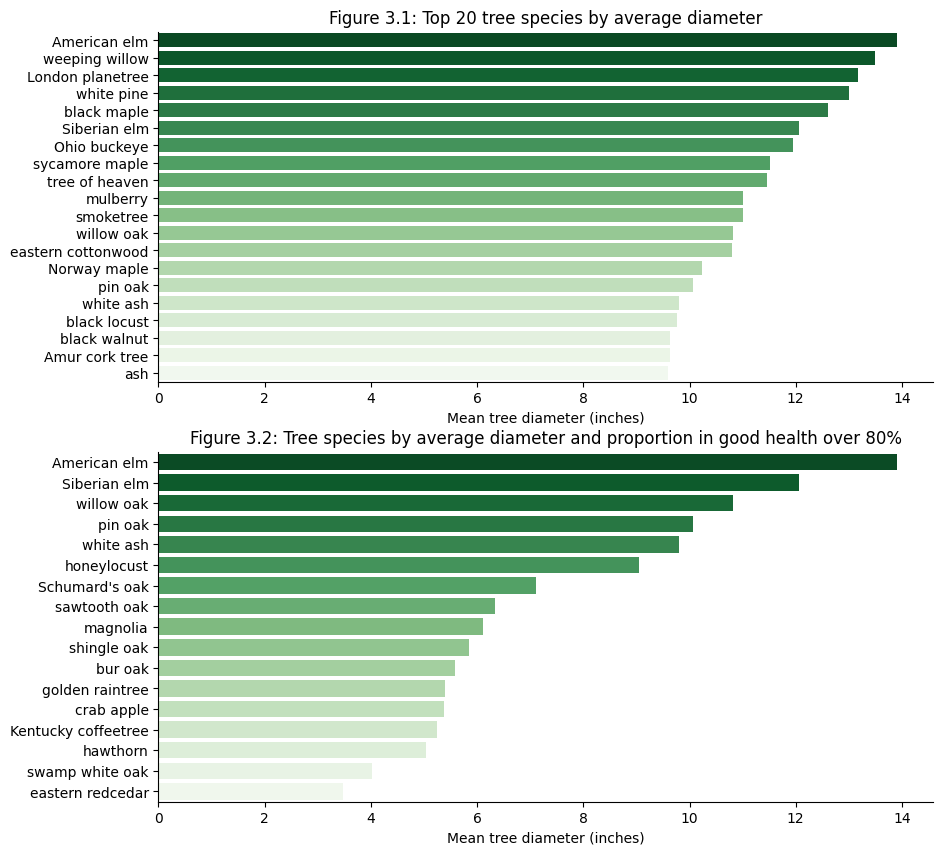

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

# generate a horizontal bar chart of tree diameters(first subplot)
pal = sns.color_palette("Greens", 4)

sns.barplot(x = "mean_dbh", y = "spc_common", data = avg_size[:20], palette = "Greens_r", ax = ax[0])
ax[0].set(xlabel = "Mean tree diameter (inches)", ylabel = "",
          title = "Figure 3.1: Top 20 tree species by average diameter")

sns.barplot(x = "mean_dbh", y = "spc_common", data = species_sizes, palette = "Greens_r", ax = ax[1])
ax[1].set(xlabel = "Mean tree diameter (inches)", ylabel = "",
          title = "Figure 3.2: Tree species by average diameter and proportion in good health over 80%")

sns.despine(right = True, top = True)

In addition, there were nine attributes indicating various types of problems with the trees in Manhattan. These were summed to give an overall measure of the number of reported problems, and then averaged across the different species. It was determined that the average number of problems reported was very low for most tree species (one or fewer), and there was no species with a large number of problems.

In [44]:
# What features are most indicative of tree health?

# add a column combining 'health' and 'status'
trees['status_health'] = trees.apply(lambda x: x['status'] + "-" + x['health'] if x['status'] == 'Alive' else x['status'], axis=1)

# create numeric representations of 'status' and 'health'
trees['status_int'] = (trees.status == "Alive").astype(int)
enc = OrdinalEncoder(categories = [['Dead', 'Alive-Poor', 'Alive-Fair', 'Alive-Good']])
trees[['status_health_int']] = enc.fit_transform(trees[['status_health']])
enc2 = OrdinalEncoder(categories = [['_N/A', 'Poor', 'Fair', 'Good']])
trees[['health_int']] = enc2.fit_transform(trees[['health']])

# create numeric representations of other binary variables
enc3 = OrdinalEncoder()
new_vars = ['is_on_curb', 'is_root_stone', 'is_root_grate', 'is_root_other', 'is_trnk_wire', 'is_trnk_light', 'is_trnk_other',
            'is_brch_light', 'is_brch_shoe', 'is_brch_other']
trees[new_vars] = enc3.fit_transform(trees[['curb_loc', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                                            'brch_light', 'brch_shoe', 'brch_other']])

# create a variable indicating the number of reported problems with the tree
trees['num_problems'] = trees.is_root_stone + trees.is_root_grate + trees.is_root_other + trees.is_trnk_wire + trees.is_trnk_light + trees.is_trnk_other + trees.is_brch_light + trees.is_brch_shoe + trees.is_brch_other

In [45]:
problems = trees.groupby('spc_common')['num_problems'].agg(['mean', 'median'])
problems.sort_values(by = 'mean', inplace = True, ascending = False)

Correlation and mutual information were used to investigate the relationship between the target variables (tree health and tree status) and the tree attributes. The first metric indicated a slight positive relationship between tree diameter and tree health (that is, healthy trees were larger) and a slightly negative relationship with the attribute indicating if there was a not-otherwise-specified problem with a branch. In addition, tree status (whether it was reported as alive or dead) was also slightly positively correlated with tree diameter (larger trees were more likely to be alive) and oddly, the total number of problems with the tree.

Mutual information is an alternative measure to correlation coefficients that can detect non-linear relationships and handle non-numeric inputs. It estimates the amount of information that can be known about one variable by knowing the values of another. The mutual information measure indicated that the attributes most indicative of a tree's health or status were geographic location (latitude and longitude) and species, and tree diameter coming in a distant fourth.

In [46]:
num_vars = ['tree_dbh', 'is_on_curb', 'is_root_stone', 'is_root_grate', 'is_root_other', 'is_trnk_wire', 'is_trnk_light', 'is_trnk_other',
            'is_brch_light', 'is_brch_shoe', 'is_brch_other', 'latitude', 'longitude', 'postcode', 'num_problems']
status_corr = trees[num_vars].corrwith(trees.status_int).to_frame('status')
health_corr = trees[num_vars].corrwith(trees.health_int).to_frame('health')
status_health_corr = trees[num_vars].corrwith(trees.status_health_int).to_frame('status_health')

# no strong correlations between any variant on the target variable and any of the binary/numeric variables
print("Table 2: Correlation between the 'target' variables - status and health and the tree attributes")
correlation_df = pd.merge(status_corr, health_corr, how = 'inner', left_index=True, right_index=True)
# correlation_df = pd.merge(correlation_df, status_health_corr, how = 'inner', left_index=True, right_index=True)
correlation_df.sort_values(by = 'health', ascending = False)
correlation_df

Table 2: Correlation between the 'target' variables - status and health and the tree attributes


status    health
tree_dbh       0.127672  0.163162
is_on_curb    -0.015304 -0.043001
is_root_stone  0.083833  0.015178
is_root_grate  0.034063 -0.006789
is_root_other  0.049455 -0.016716
is_trnk_wire   0.020447 -0.010634
is_trnk_light  0.012228  0.005185
is_trnk_other  0.052406 -0.081078
is_brch_light  0.019967 -0.010274
is_brch_shoe   0.005238 -0.005723
is_brch_other  0.057322 -0.110771
latitude      -0.010115 -0.020005
longitude     -0.009857 -0.039206
postcode      -0.018787 -0.052235
num_problems   0.110825 -0.071143

In [47]:
trees_mi = trees.iloc[:, 1:21]

def calculate_mutual_info(series):
    return mutual_info_score(series, trees.status_int)

status_mi = trees_mi.apply(calculate_mutual_info)
status_mi = status_mi.sort_values(ascending=False).to_frame(name='status')

def calculate_mutual_info(series):
    return mutual_info_score(series, trees.health_int)

health_mi = trees_mi.apply(calculate_mutual_info)
health_mi = health_mi.sort_values(ascending=False).to_frame(name='health')

mi_df = pd.merge(status_mi, health_mi, how = 'inner', left_index = True, right_index = True)
mi_df = mi_df.iloc[3:, ]
print("Table 3: Mutual information scores between the 'target' variables - status and health and the tree attributes")
mi_df

Table 3: Mutual information scores between the 'target' variables - status and health and the tree attributes


status    health
latitude    0.127810  0.792631
spc_common  0.127755  0.148837
longitude   0.127680  0.791587
tree_dbh    0.015959  0.024019
root_stone  0.006211  0.007945
brch_other  0.003070  0.018266
trnk_other  0.002588  0.011714
postcode    0.002424  0.015649
root_other  0.002316  0.004148
nta         0.001983  0.013498
nta_name    0.001983  0.013498
root_grate  0.001122  0.001841
trunk_wire  0.000409  0.000813
brch_light  0.000390  0.000921
trnk_light  0.000147  0.000218
curb_loc    0.000131  0.001138
brch_shoe   0.000027  0.000083

In [48]:
# add a column combining status and health
# trees['status_health'] = trees.apply(lambda x: x['status'] + "-" + x['health'] if x['status'] == 'Alive' else x['status'], axis=1)
# calculate the total number of trees in each neighbourhood
overall_tree_counts = trees.groupby('nta', as_index=False)['tree_id'].size()
# calculate the number of trees in each neighbourhood by tree health/status
tree_counts = trees.groupby(['nta', 'status_health'], as_index=False)['tree_id'].size()
# filter the geopandas dataframe so it only contains the information for Manhattan
Manhattan_neighbourhoods = neighbourhoods[neighbourhoods.boroname == "Manhattan"]
# merge the tree counts with the reduced neighbourhoods geodataframe
Manhattan_trees = pd.merge(Manhattan_neighbourhoods, overall_tree_counts, how='outer', left_on='ntacode', right_on='nta')
Manhattan_trees.drop(['borocode', 'boroname', 'countyfips', 'nta'], axis=1, inplace=True)
Manhattan_trees.rename(columns={"size":"total_tree_count"}, inplace=True)
Manhattan_trees = pd.merge(Manhattan_trees, tree_counts, how='outer', left_on='ntacode', right_on='nta')
Manhattan_trees.drop(['nta'], axis=1, inplace=True)
Manhattan_trees.rename(columns={"size":"tree_count"}, inplace=True)
# fill missing numeric values
Manhattan_trees['total_tree_count'].fillna(0, inplace=True)
Manhattan_trees['tree_count'].fillna(0, inplace=True)

Figures 4.1 and 4.2 show tree counts by neighbourhood. They both clearly indicate that the neighbourhood with the largest amount of trees is Upper West Side, followed by Upper East Side-Carnegie Hill and West Village. On the other hand, the neighbourhoods with the fewest trees are Stuyvestant Town-Cooper Village, Manhattanville, Gramercy and Midtown-Midtown South. Interestingly, however, is the observation that this ordering is not necessarily consistent with the ordering of neighbourhoods by proportion of trees in good health (Figure 4.3).

Finally, Figure 4.4 shows the individual tree locations, and Appendix 1 presents a more detailed view by breaking the visualisation up into separate plots of the individual neighbourhoods.

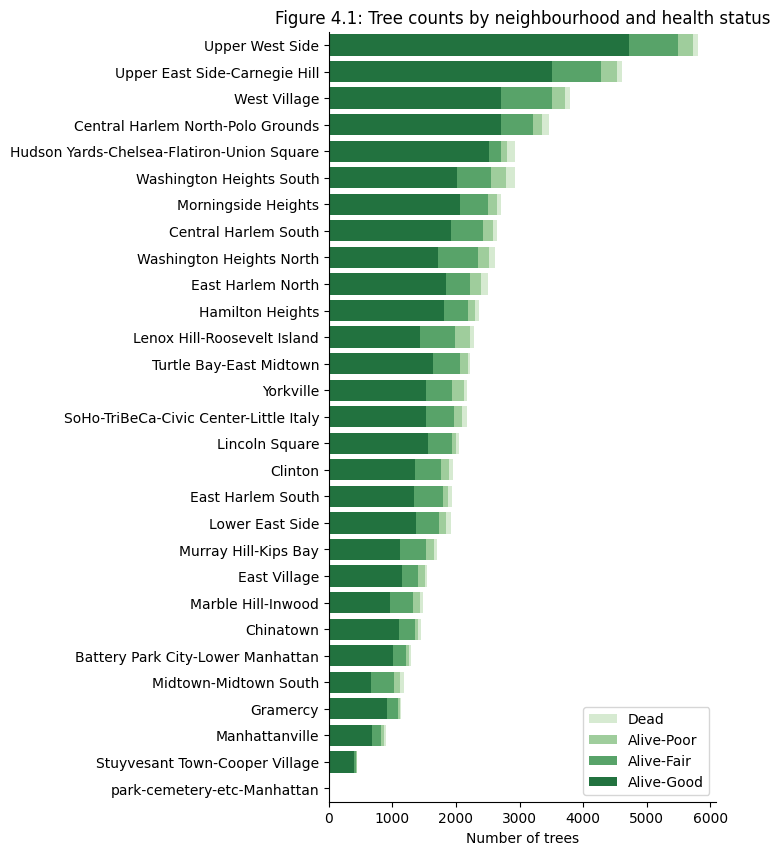

In [54]:
# transform the dataframe from long to wide
Manhattan_trees_wide = pd.pivot(Manhattan_trees, index=['ntacode', 'ntaname'], columns='status_health', values='tree_count').reset_index()
Manhattan_trees_wide['Total'] = Manhattan_trees_wide['Alive-Fair']+Manhattan_trees_wide['Alive-Good']+Manhattan_trees_wide['Alive-Poor']+Manhattan_trees_wide['Dead']
Manhattan_trees_wide.fillna(0, inplace=True)
# Manhattan_trees_wide.drop('nan', axis=1, inplace=True)
Manhattan_trees_wide.sort_values(by='Total', ascending=False, inplace=True)
Manhattan_trees_wide['Alive-Good-Fair'] = Manhattan_trees_wide['Alive-Good']+Manhattan_trees_wide['Alive-Fair']
Manhattan_trees_wide['Alive-Good-Fair-Poor'] = Manhattan_trees_wide['Alive-Good-Fair']+Manhattan_trees_wide['Alive-Poor']

fig, ax = plt.subplots(figsize=(5,10))

# generate a stacked horizontal bar chart with bars stacked by proportion of each health status (first subplot)
pal = sns.color_palette("Greens", 4)

# 'dead' trees
sns.barplot(x = "Total", y = "ntaname", data = Manhattan_trees_wide, color = pal[0], label = "Dead", ax = ax)
# trees in 'poor' health
sns.barplot(x = "Alive-Good-Fair-Poor", y = "ntaname", data = Manhattan_trees_wide, color = pal[1], label = "Alive-Poor", ax = ax)
# trees in 'fair' health
sns.barplot(x = "Alive-Good-Fair", y = "ntaname", data = Manhattan_trees_wide, color = pal[2], label = "Alive-Fair", ax = ax)
# trees in good health
sns.barplot(x = "Alive-Good", y = "ntaname", data = Manhattan_trees_wide, color = pal[3], label = "Alive-Good", ax = ax)

ax.legend(loc = "lower right", frameon = True)
ax.set(xlabel = "Number of trees", ylabel = "",
          title = "Figure 4.1: Tree counts by neighbourhood and health status")
sns.despine()

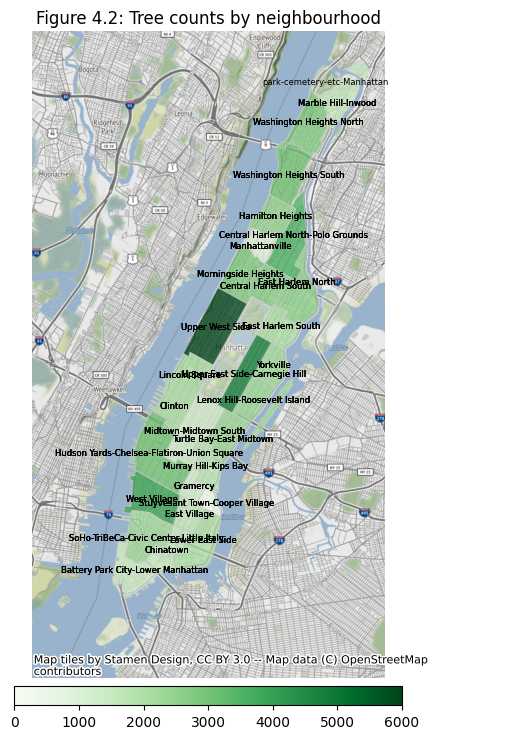

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
Manhattan_trees_wm = Manhattan_trees.to_crs(epsg=3857)

Manhattan_trees_wm.plot(column='total_tree_count', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.3)
cx.add_basemap(ax=ax, source=cx.providers.Stamen.Terrain)
cx.add_basemap(ax=ax, source=cx.providers.Stamen.TerrainLabels)
ax.axis('off')
ax.set_title("Figure 4.2: Tree counts by neighbourhood")
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=6000))
cbar = fig.colorbar(sm, shrink = 0.5, orientation = 'horizontal', pad = 0.01)

# add neighbourhood names to the plot
Manhattan_trees_wm['coords'] = Manhattan_trees_wm.geometry.apply(lambda x: x.representative_point().coords[:])
Manhattan_trees_wm.coords = [coord[0] for coord in Manhattan_trees_wm.coords]

for idx, row in Manhattan_trees_wm.iterrows():
    plt.annotate(text = row['ntaname'], xy = row['coords'], ha = 'center', va = 'center', size = 6)

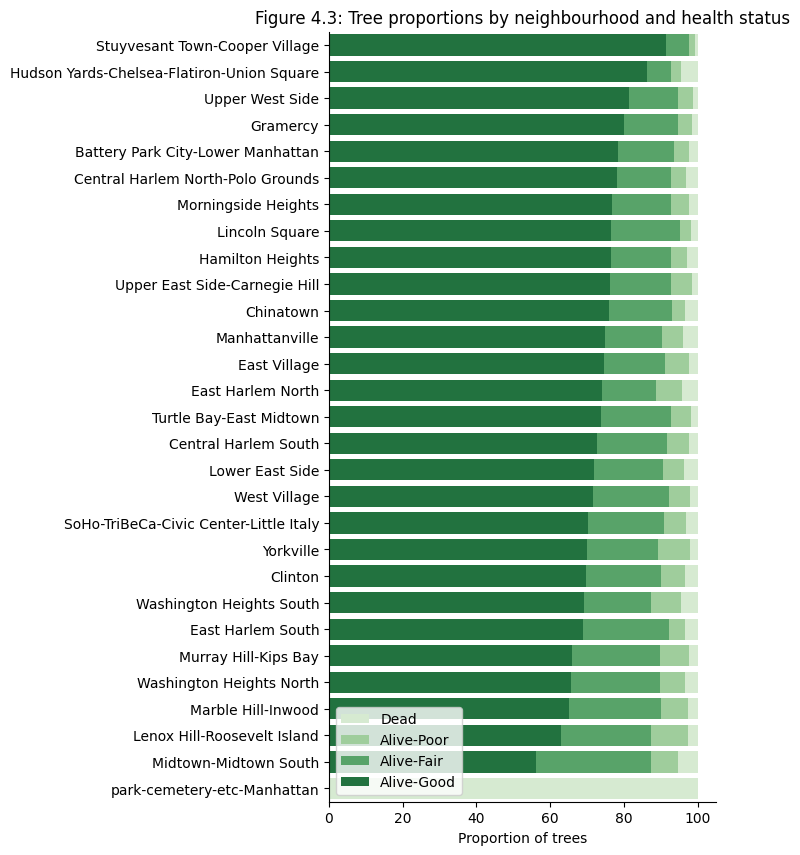

In [50]:
Manhattan_trees_wide['Alive-Fair-Prop'] = Manhattan_trees_wide['Alive-Fair'] / Manhattan_trees_wide.Total * 100
Manhattan_trees_wide['Alive-Good-Prop'] = Manhattan_trees_wide['Alive-Good'] / Manhattan_trees_wide.Total * 100
Manhattan_trees_wide['Alive-Poor-Prop'] = Manhattan_trees_wide['Alive-Poor'] / Manhattan_trees_wide.Total * 100
Manhattan_trees_wide['Total-Prop'] = 100
Manhattan_trees_wide['Alive-Good-Fair-Prop'] = Manhattan_trees_wide['Alive-Good-Fair'] / Manhattan_trees_wide.Total * 100
Manhattan_trees_wide['Alive-Good-Fair-Poor-Prop'] = Manhattan_trees_wide['Alive-Good-Fair-Poor'] / Manhattan_trees_wide.Total * 100
Manhattan_trees_wide.sort_values(by = 'Alive-Good-Prop', inplace = True, ascending = False)

fig, ax = plt.subplots(figsize=(5,10))

# generate a stacked horizontal bar chart with bars stacked by proportion of each health status (first subplot)
pal = sns.color_palette("Greens", 4)

# 'dead' trees
sns.barplot(x = "Total-Prop", y = "ntaname", data = Manhattan_trees_wide, color = pal[0], label = "Dead", ax = ax)
# trees in 'poor' health
sns.barplot(x = "Alive-Good-Fair-Poor-Prop", y = "ntaname", data = Manhattan_trees_wide, color = pal[1], label = "Alive-Poor", ax = ax)
# trees in 'fair' health
sns.barplot(x = "Alive-Good-Fair-Prop", y = "ntaname", data = Manhattan_trees_wide, color = pal[2], label = "Alive-Fair", ax = ax)
# trees in good health
sns.barplot(x = "Alive-Good-Prop", y = "ntaname", data = Manhattan_trees_wide, color = pal[3], label = "Alive-Good", ax = ax)

ax.legend(loc = "lower left", frameon = True)
ax.set(xlabel = "Proportion of trees", ylabel = "",
       title = "Figure 4.3: Tree proportions by neighbourhood and health status")
sns.despine(right = True, top = True)

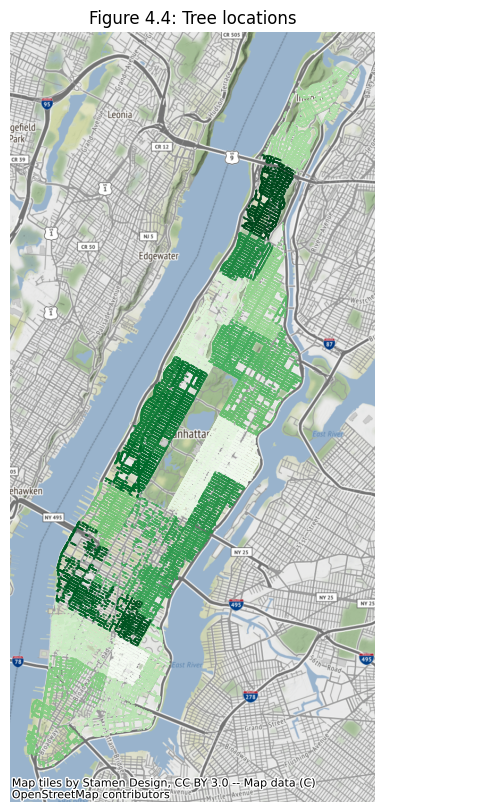

In [51]:
# merge the tree locations with the reduced neighbourhoods geodataframe
Manhattan_trees_loc = pd.merge(Manhattan_neighbourhoods, trees, how='outer', left_on='ntacode', right_on='nta')
Manhattan_trees_loc.drop(['borocode', 'boroname', 'countyfips', 'nta_name'], axis=1, inplace=True)
Manhattan_trees_loc = Manhattan_trees_loc.iloc[:, 0:25]
# change the geometry from polygons to points
Manhattan_trees_loc = gpd.GeoDataFrame(Manhattan_trees_loc,
                                       geometry = gpd.points_from_xy(Manhattan_trees_loc['longitude'],
                                                                     Manhattan_trees_loc['latitude']),
                                       crs='EPSG:4326')
Manhattan_trees_loc_wm = Manhattan_trees_loc.to_crs(epsg=3857)

# plot the tree locations
fig, ax = plt.subplots(figsize=(10,10))
Manhattan_trees_loc_wm.plot(ax = ax, cmap = 'Greens', markersize = 0.1)
cx.add_basemap(ax = ax)
ax.axis('off')
ax.set_title("Figure 4.4: Tree locations");

## Appendix 1: Neighbourhood tree location visualisations

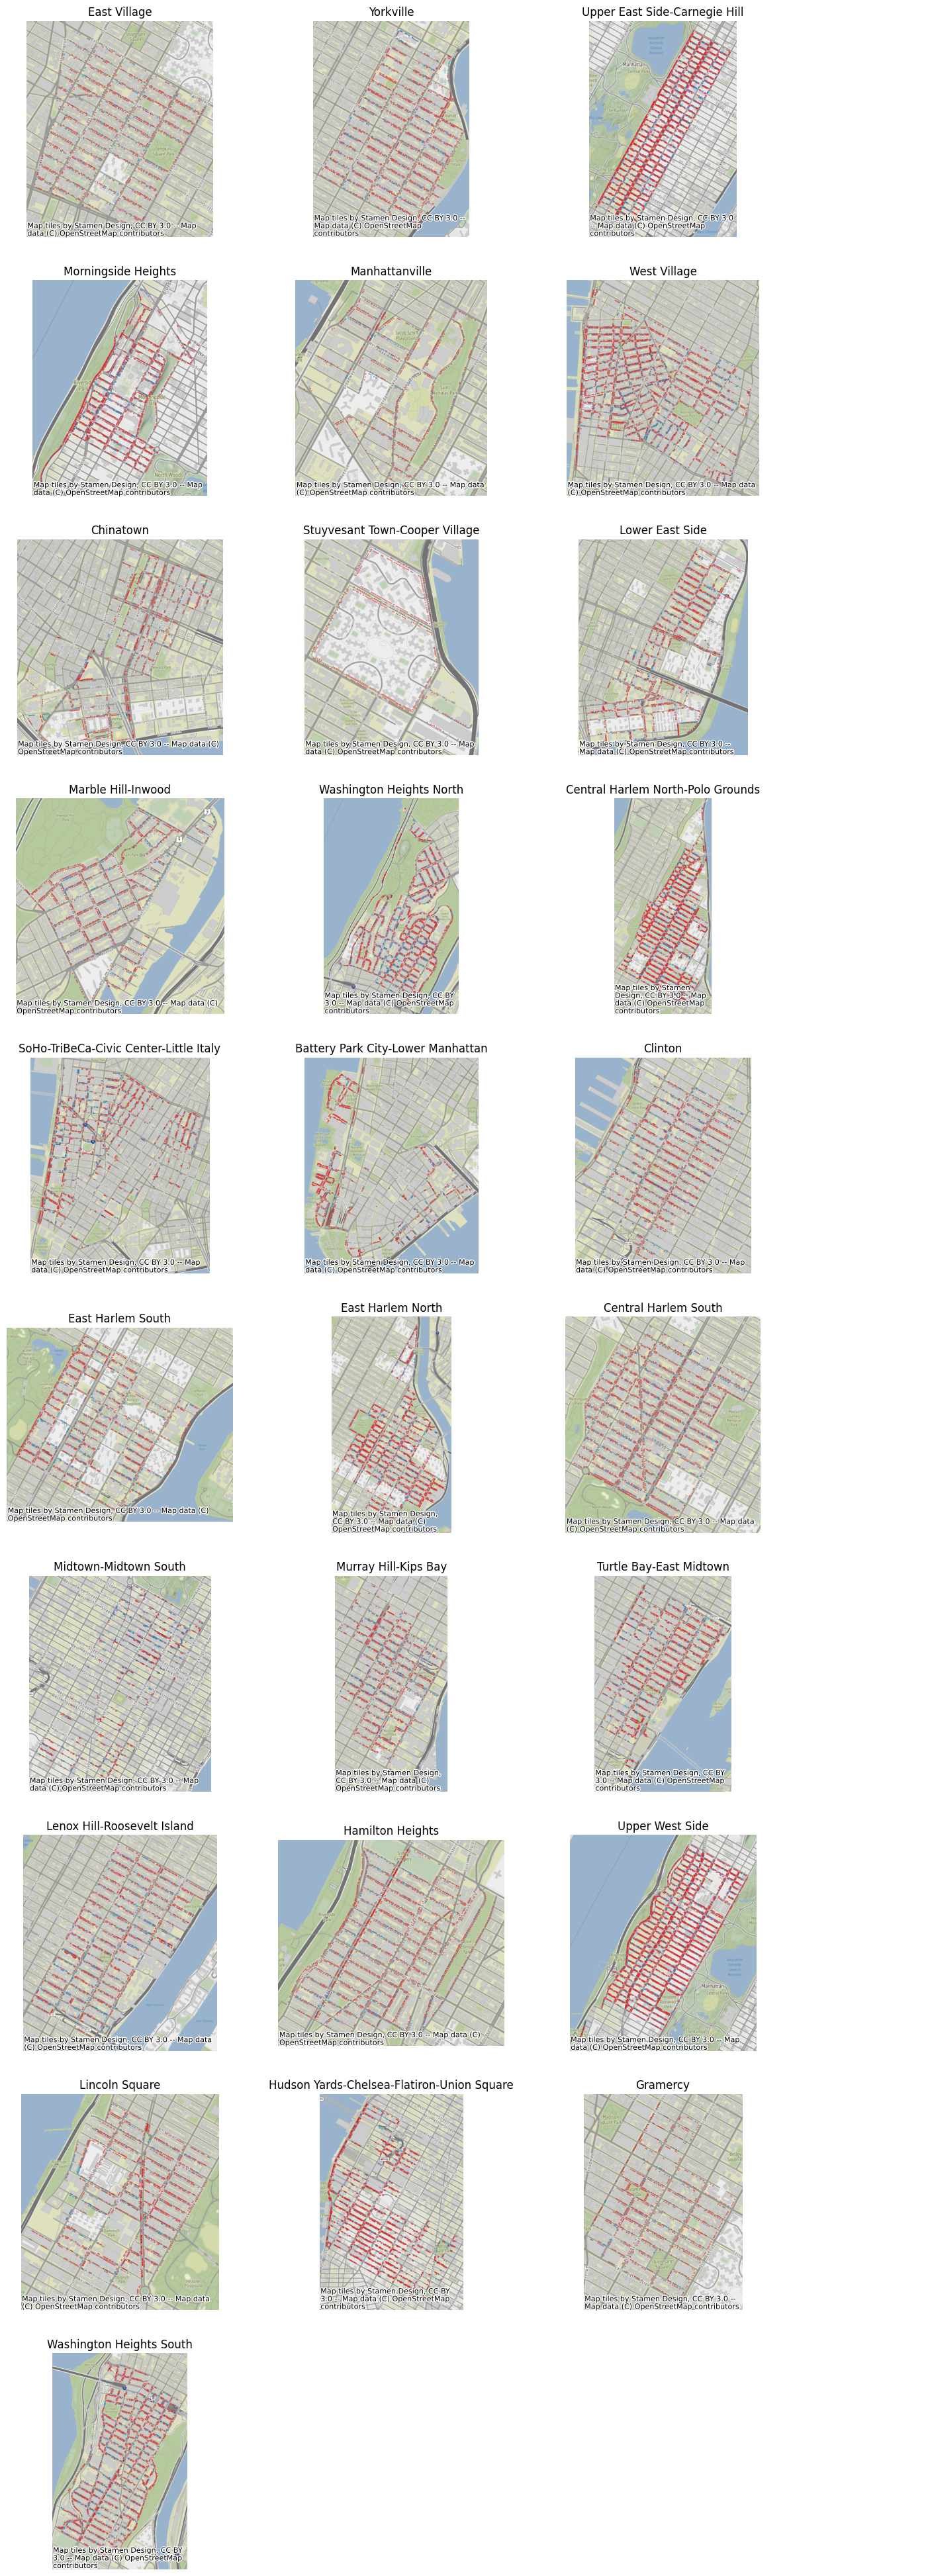

In [80]:
neighbourhoods = Manhattan_trees_loc_wm.ntaname.unique()
neighbourhoods = neighbourhoods[neighbourhoods != 'park-cemetery-etc-Manhattan']

fig = plt.figure(figsize=(15,50))

for idx in range(len(neighbourhoods)):
    plot_data = Manhattan_trees_loc_wm.loc[Manhattan_trees_loc_wm.ntaname == neighbourhoods[idx]]
    ax = fig.add_subplot(10, 3, idx+1)
    plot_data.plot(column = 'status_health', markersize = 0.1, legend = False, ax = ax)
    cx.add_basemap(ax = ax)
    ax.axis('off')
    ax.set_title(neighbourhoods[idx])

## Appendix 2: Analysis Briefing

**Which tree species should the city plant?**

**📖 Background**

You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

**💾 The data**

The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

**Tree Census**
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

**Neighborhoods' geographical information**
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [1]:
import pandas as pd
import geopandas as gpd
trees = pd.read_csv('data/trees.csv')
trees.head()

In [2]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods.head()

**💪 Challenge**

Create a report that covers the following:
* What are the most common tree species in Manhattan?
* Which are the neighborhoods with the most trees?
* A visualization of Manhattan's neighborhoods and tree locations.
* What ten tree species would you recommend the city plant in the future?

**🧑‍⚖️ Judging criteria**

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 85%       | <ul><li> Accuracy (30%) - The response must be representative of the original data and free from errors.</li><li> Clarity (25%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (30%) - The response must be a full report that responds to the questions posed.</li></ul>       |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, earlier submission time will be used as a tie-breaker.

**📘 Rules**
To be eligible to win, you must:
* Submit your response before the deadline. 
All responses must be submitted in English.

Entrants must be:
* 18+ years old.
* Allowed to take part in a skill-based competition from their country.
Entrants can not:
* Be in a country currently sanctioned by the U.S. government.

**✅ Checklist before publishing**
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

**⌛️ Time is ticking. Good luck!**